In [1]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from optimization_dummy import run as run_dynamic_mutation
from optimization_base_algo import run as run_base_algo

def get_results(algorithm):
    results = {1: {}, 2: {}, 4: {}}
    pops = {1: {}, 2: {}, 4: {}}
    envs = {1: {}, 2: {}, 4: {}}

    gens = 30

    for enemy in [1, 2, 4]:
        means = []
        bests =[]
        div = []
        
        for i in range(10):
            run_results, pop, env = algorithm(enemy)
            
            means.append(run_results['mean'])
            bests.append(run_results['best'])
            div.append(run_results['div'])
            
        

        pops[enemy] = pop
        envs[enemy] = env
        
        means = np.array(means)
        mean_r = [np.mean(means[:,i]) for i in range(gens)]
            
        bests = np.array(bests)
        best_r = [np.mean(bests[:,i]) for i in range(gens)]

        div = np.array(div)
        div_r = [np.mean(div[:,i]) for i in range(gens)]

        means_std = np.std(means, axis=0)
        bests_std = np.std(bests, axis=0)


        results[enemy]['mean'] = mean_r
        results[enemy]['best'] = best_r
        results[enemy]['mean_std'] = means_std
        results[enemy]['best_std'] = bests_std
        results[enemy]['div'] = div_r

    return results, pops, envs

results_d, pops_d, envs_d = get_results(run_dynamic_mutation)

# results_d = {1: {}, 2: {}, 4: {}}
# pops_d = {1: {}, 2: {}, 4: {}}
# envs_d = {1: {}, 2: {}, 4: {}}

# gens = 30


# for enemy in [1, 2, 4]:
#     means = []
#     bests =[]
#     div = []
    
#     for i in range(10):
#         run_results, pop, env = run_dynamic_mutation(enemy)
        
#         means.append(run_results['mean'])
#         bests.append(run_results['best'])
#         div.append(run_results['div'])
        
    

#     pops_d[enemy] = pop
#     envs_d[enemy] = env
    
#     means = np.array(means)
#     mean_r = [np.mean(means[:,i]) for i in range(gens)]
        
#     bests = np.array(bests)
#     best_r = [np.mean(bests[:,i]) for i in range(gens)]

#     div = np.array(div)
#     div_r = [np.mean(div[:,i]) for i in range(gens)]

#     means_std = np.std(means, axis=0)
#     bests_std = np.std(bests, axis=0)


#     results_d[enemy]['mean'] = mean_r
#     results_d[enemy]['best'] = best_r
#     results_d[enemy]['mean_std'] = means_std
#     results_d[enemy]['best_std'] = bests_std
#     results_d[enemy]['div'] = div_r

pygame 2.5.1 (SDL 2.28.2, Python 3.9.10)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 30.241098 -3.816699 7.010485
Initial mutation rate: 0.2
diversity 26.690834423777794
Mutation rate at generation 1: 0.2
Gen 1 - Best: 30.24109822612272 - Mean: -2.873450844911486
Gen 1 - Diversity: 26.951449915334685
diversity 26.709621830229022
Mutation rate at generation 2: 0.2
Gen 2 - Best: 48.20698639161586 - Me

Gen 12 - Best: 75.19788162462294 - Mean: 28.292928968652095
Gen 12 - Diversity: 27.025194244483753
diversity 26.96804261769952
Mutation rate at generation 13: 0.24200000000000005
Gen 13 - Best: 75.19788162462294 - Mean: 28.739221404801075
Gen 13 - Diversity: 27.02485583736051
diversity 26.75727394692389
Mutation rate at generation 14: 0.24200000000000005
Gen 14 - Best: 75.19788162462294 - Mean: 29.62640379368553
Gen 14 - Diversity: 27.083830852215012
diversity 26.780884819388014
Mutation rate at generation 15: 0.24200000000000005
Gen 15 - Best: 94.91859563501554 - Mean: 31.163609881502172
Gen 15 - Diversity: 27.123868246321777
diversity 26.848755428081745
Mutation rate at generation 16: 0.24200000000000005
Gen 16 - Best: 94.91859563501554 - Mean: 32.67771608397548
Gen 16 - Diversity: 27.211109403828594
diversity 27.03448085182003
Mutation rate at generation 17: 0.24200000000000005
Gen 17 - Best: 94.91859563501554 - Mean: 33.47903705895979
Gen 17 - Diversity: 27.25955144541643
diversity

Gen 29 - Best: 94.91859563501554 - Mean: 43.50950405240598
Gen 29 - Diversity: 27.25211797484839

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 39.013548 -3.715588 7.815677
Initial mutation rate: 0.2
diversity 26.395133639167756
Mutation rate increased to 0.22000000000000003 at diversity 26.395133639167756
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 39.013547994715566 - Mean: -3.116982971702647
Gen 1 - Diversity: 26.7479774122851
diversity 26.553294947

Gen 10 - Best: 48.15356122494227 - Mean: 20.560123308222764
Gen 10 - Diversity: 27.070657002276
diversity 26.65663238453389
Mutation rate at generation 11: 0.22000000000000003
Gen 11 - Best: 48.15356122494227 - Mean: 23.794969102575518
Gen 11 - Diversity: 27.034569133951226
diversity 26.808562004363893
Mutation rate at generation 12: 0.22000000000000003
Gen 12 - Best: 48.15356122494227 - Mean: 26.85406128895764
Gen 12 - Diversity: 27.046785941608043
diversity 26.759579647935734
Mutation rate at generation 13: 0.22000000000000003
Gen 13 - Best: 48.15356122494227 - Mean: 28.917564015809536
Gen 13 - Diversity: 27.045880854619078
diversity 26.912364624556968
Mutation rate at generation 14: 0.22000000000000003
Gen 14 - Best: 48.15356122494227 - Mean: 29.644002409086884
Gen 14 - Diversity: 27.042152605630356
diversity 26.64319025101697
Mutation rate at generation 15: 0.22000000000000003
Gen 15 - Best: 48.15356122494227 - Mean: 31.42126292631247
Gen 15 - Diversity: 27.12812427975942
diversity

Gen 26 - Best: 94.85250552318655 - Mean: 41.708265282017756
Gen 26 - Diversity: 27.191584263706876
diversity 26.89448548839703
Mutation rate at generation 27: 0.2
Gen 27 - Best: 94.85250552318655 - Mean: 42.35999084732026
Gen 27 - Diversity: 27.2078650264971
diversity 26.891374166091317
Mutation rate at generation 28: 0.2
Gen 28 - Best: 94.85250552318655 - Mean: 42.54066048689908
Gen 28 - Diversity: 27.173218047353327
diversity 26.604728883384414
Mutation rate at generation 29: 0.2
Gen 29 - Best: 94.85250552318655 - Mean: 42.996921162548205
Gen 29 - Diversity: 27.14163176034129

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest


Gen 11 - Best: 94.85250552318655 - Mean: 21.687788666422747
Gen 11 - Diversity: 27.131061693462566
diversity 26.878607492415885
Mutation rate at generation 12: 0.2
Gen 12 - Best: 94.85250552318655 - Mean: 23.390730591345324
Gen 12 - Diversity: 27.162570018504752
diversity 26.980296607000273
Mutation rate at generation 13: 0.2
Gen 13 - Best: 94.85250552318655 - Mean: 25.996318386521462
Gen 13 - Diversity: 27.191989955003883
diversity 26.951642114539922
Mutation rate at generation 14: 0.2
Gen 14 - Best: 94.85250552318655 - Mean: 30.27445844600787
Gen 14 - Diversity: 27.20127302225618
diversity 26.851053054811214
Mutation rate at generation 15: 0.2
Gen 15 - Best: 94.85250552318655 - Mean: 32.169341933301986
Gen 15 - Diversity: 27.217826670196654
diversity 26.98361150291829
Mutation rate at generation 16: 0.2
Gen 16 - Best: 94.85250552318655 - Mean: 33.14761793974567
Gen 16 - Diversity: 27.16336633912096
diversity 27.166054949416026
Mutation rate at generation 17: 0.2
Gen 17 - Best: 94.852

Gen 26 - Best: 66.17695410451698 - Mean: 41.397590643232526
Gen 26 - Diversity: 27.64792792177161
diversity 27.25411672177243
Mutation rate at generation 27: 0.22000000000000003
Gen 27 - Best: 66.17695410451698 - Mean: 41.48684281992391
Gen 27 - Diversity: 27.573475442669103
diversity 27.35918173300959
Mutation rate at generation 28: 0.22000000000000003
Gen 28 - Best: 94.79051384715858 - Mean: 42.04883969142076
Gen 28 - Diversity: 27.538470535299382
diversity 27.073121776128417
Mutation rate at generation 29: 0.22000000000000003
Gen 29 - Best: 94.79051384715858 - Mean: 42.14389507111553
Gen 29 - Diversity: 27.469839943566857

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initializa

Gen 11 - Best: 93.20278772623588 - Mean: 88.17871695137663
Gen 11 - Diversity: 27.066846846334162
diversity 26.666139415247606
Mutation rate at generation 12: 0.2
Gen 12 - Best: 93.20278772623588 - Mean: 89.11326729175194
Gen 12 - Diversity: 27.01020684978242
diversity 26.74345703879325
Mutation rate at generation 13: 0.2
Gen 13 - Best: 93.20278772623588 - Mean: 89.27932011917183
Gen 13 - Diversity: 27.013322722607715
diversity 26.739669746221963
Mutation rate at generation 14: 0.2
Gen 14 - Best: 93.20278772623588 - Mean: 89.40262520687065
Gen 14 - Diversity: 26.980301815650602
diversity 26.634120023123362
Mutation rate at generation 15: 0.2
Gen 15 - Best: 93.20278772623588 - Mean: 89.49428648463399
Gen 15 - Diversity: 27.080287898147816
diversity 26.89118058854639
Mutation rate at generation 16: 0.2
Gen 16 - Best: 93.20278772623588 - Mean: 89.70323303493103
Gen 16 - Diversity: 27.17550476619873
diversity 27.00450084495496
Mutation rate at generation 17: 0.2
Gen 17 - Best: 93.202787726

Gen 26 - Best: 93.40956741322127 - Mean: 90.54345060989971
Gen 26 - Diversity: 27.3977504086087
diversity 26.990233854125208
Mutation rate at generation 27: 0.22000000000000003
Gen 27 - Best: 93.40956741322127 - Mean: 90.67972824435654
Gen 27 - Diversity: 27.41751803599529
diversity 27.07512067092679
Mutation rate at generation 28: 0.22000000000000003
Gen 28 - Best: 93.40956741322127 - Mean: 91.16046464052302
Gen 28 - Diversity: 27.436416441558464
diversity 27.170057965374554
Mutation rate at generation 29: 0.22000000000000003
Gen 29 - Best: 93.40956741322127 - Mean: 91.38788569966476
Gen 29 - Diversity: 27.466946465750702

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initializati

Gen 9 - Best: 92.41821644970791 - Mean: 73.81017415469137
Gen 9 - Diversity: 27.43097420052343
diversity 27.16771396647572
Mutation rate at generation 10: 0.22000000000000003
Gen 10 - Best: 92.41821644970791 - Mean: 81.9230281581536
Gen 10 - Diversity: 27.54383823415652
diversity 27.43568910842587
Mutation rate at generation 11: 0.22000000000000003
Gen 11 - Best: 92.41821644970791 - Mean: 86.04511423762649
Gen 11 - Diversity: 27.488911424254837
diversity 27.08612945558369
Mutation rate at generation 12: 0.22000000000000003
Gen 12 - Best: 92.57237888630937 - Mean: 88.45846912811406
Gen 12 - Diversity: 27.422371258925203
diversity 27.116276170041242
Mutation rate at generation 13: 0.22000000000000003
Gen 13 - Best: 92.57237888630937 - Mean: 88.82391458348255
Gen 13 - Diversity: 27.432470184379483
diversity 27.28115841435038
Mutation rate at generation 14: 0.22000000000000003
Gen 14 - Best: 92.57237888630937 - Mean: 88.99597707919338
Gen 14 - Diversity: 27.490734379887762
diversity 27.171

Gen 25 - Best: 93.40956741322127 - Mean: 91.65586241878569
Gen 25 - Diversity: 27.22248587788277
diversity 26.868437872372095
Mutation rate at generation 26: 0.2
Gen 26 - Best: 93.40956741322127 - Mean: 91.65586241878569
Gen 26 - Diversity: 27.224664504763968
diversity 26.868500930657348
Mutation rate at generation 27: 0.2
Gen 27 - Best: 93.40956741322127 - Mean: 91.68176528877162
Gen 27 - Diversity: 27.183142355053192
diversity 26.78264332894228
Mutation rate at generation 28: 0.2
Gen 28 - Best: 93.40956741322127 - Mean: 91.69739859603443
Gen 28 - Diversity: 27.15794828964526
diversity 26.7838882110366
Mutation rate at generation 29: 0.2
Gen 29 - Best: 93.40956741322127 - Mean: 91.69739859603443
Gen 29 - Diversity: 27.185061434379666

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current en

Gen 11 - Best: 93.00278772623588 - Mean: 89.12171374637643
Gen 11 - Diversity: 27.212927567156097
diversity 27.14635310597906
Mutation rate at generation 12: 0.2
Gen 12 - Best: 93.00278772623588 - Mean: 89.23505067491787
Gen 12 - Diversity: 27.287018296351214
diversity 27.230844555060195
Mutation rate at generation 13: 0.2
Gen 13 - Best: 93.00278772623588 - Mean: 89.38949450125426
Gen 13 - Diversity: 27.263791042424614
diversity 27.185191149220124
Mutation rate at generation 14: 0.2
Gen 14 - Best: 93.00278772623588 - Mean: 89.47977083472932
Gen 14 - Diversity: 27.27909923382027
diversity 26.972626345659158
Mutation rate at generation 15: 0.2
Gen 15 - Best: 93.00278772623588 - Mean: 89.62027549535142
Gen 15 - Diversity: 27.282874668069322
diversity 27.050564686948523
Mutation rate at generation 16: 0.2
Gen 16 - Best: 93.00278772623588 - Mean: 89.8070291136191
Gen 16 - Diversity: 27.290126638971547
diversity 26.92317744188435
Mutation rate at generation 17: 0.2
Gen 17 - Best: 93.00278772

Gen 26 - Best: 93.33193985886487 - Mean: 91.77065728447447
Gen 26 - Diversity: 27.55229861377446
diversity 27.342358158642583
Mutation rate at generation 27: 0.22000000000000003
Gen 27 - Best: 93.33193985886487 - Mean: 91.81026023787228
Gen 27 - Diversity: 27.540657255823014
diversity 27.1035385400489
Mutation rate at generation 28: 0.22000000000000003
Gen 28 - Best: 93.33193985886487 - Mean: 91.84037530998123
Gen 28 - Diversity: 27.50493952740684
diversity 27.005391099293988
Mutation rate at generation 29: 0.22000000000000003
Gen 29 - Best: 93.33193985886487 - Mean: 91.8519395974983
Gen 29 - Diversity: 27.39276846534034

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization

Gen 10 - Best: 92.62385026742616 - Mean: 87.86647835434009
Gen 10 - Diversity: 27.385688801602676
diversity 27.096586728985265
Mutation rate at generation 11: 0.22000000000000003
Gen 11 - Best: 92.62385026742616 - Mean: 89.05658908154993
Gen 11 - Diversity: 27.417351022753692
diversity 27.15421523613582
Mutation rate at generation 12: 0.22000000000000003
Gen 12 - Best: 92.62385026742616 - Mean: 89.32057175763846
Gen 12 - Diversity: 27.379667333531167
diversity 26.79646763547927
Mutation rate at generation 13: 0.22000000000000003
Gen 13 - Best: 92.62385026742616 - Mean: 89.56595133052278
Gen 13 - Diversity: 27.25206894168888
diversity 26.830150005939316
Mutation rate at generation 14: 0.22000000000000003
Gen 14 - Best: 92.62385026742616 - Mean: 89.74182220328353
Gen 14 - Diversity: 27.32210110062558
diversity 26.780171847791536
Mutation rate at generation 15: 0.22000000000000003
Gen 15 - Best: 92.69061166337202 - Mean: 89.87686817397513
Gen 15 - Diversity: 27.261668221228696
diversity 2

Gen 23 - Best: 86.38186017623237 - Mean: 24.81411391502187
Gen 23 - Diversity: 27.91901903236414
diversity 27.747820533374657
Mutation rate at generation 24: 0.24200000000000005
Gen 24 - Best: 86.38186017623237 - Mean: 24.90850371766872
Gen 24 - Diversity: 27.929374804522094
diversity 27.753410136337383
Mutation rate at generation 25: 0.24200000000000005
Gen 25 - Best: 86.38186017623237 - Mean: 24.999470653916745
Gen 25 - Diversity: 27.933758808502898
diversity 27.61791295939971
Mutation rate at generation 26: 0.24200000000000005
Gen 26 - Best: 86.38186017623237 - Mean: 25.084272879620485
Gen 26 - Diversity: 27.874110862750342
diversity 27.69880081046332
Mutation rate at generation 27: 0.24200000000000005
Gen 27 - Best: 86.38186017623237 - Mean: 25.174598583663297
Gen 27 - Diversity: 27.858264665647475
diversity 27.28725077458127
Mutation rate at generation 28: 0.24200000000000005
Gen 28 - Best: 86.38186017623237 - Mean: 25.175414383533216
Gen 28 - Diversity: 27.831251182425945
diversi

Gen 4 - Best: 56.470581161737776 - Mean: 12.902988683097373
Gen 4 - Diversity: 27.005132137700812
diversity 26.860310981158936
Mutation rate at generation 5: 0.22000000000000003
Gen 5 - Best: 56.470581161737776 - Mean: 14.588423047290917
Gen 5 - Diversity: 27.014719082520248
diversity 26.939258485788226
Mutation rate at generation 6: 0.22000000000000003
Gen 6 - Best: 56.470581161737776 - Mean: 15.84425122394196
Gen 6 - Diversity: 27.062864274888064
diversity 26.846144936203064
Mutation rate at generation 7: 0.22000000000000003
Gen 7 - Best: 56.470581161737776 - Mean: 18.01918183287355
Gen 7 - Diversity: 27.115102167127052
diversity 26.816887794423426
Mutation rate at generation 8: 0.22000000000000003
Gen 8 - Best: 56.470581161737776 - Mean: 20.61540480452973
Gen 8 - Diversity: 27.02057016009904
diversity 26.691663675281145
Mutation rate at generation 9: 0.22000000000000003
Gen 9 - Best: 56.470581161737776 - Mean: 22.71616477582688
Gen 9 - Diversity: 27.15723849999908
diversity 26.96905

Gen 17 - Best: 55.78549558584886 - Mean: 24.245320687389086
Gen 17 - Diversity: 27.20232447552324
diversity 26.694012483101606
Mutation rate at generation 18: 0.24200000000000005
Gen 18 - Best: 65.710284429091 - Mean: 24.780738544556815
Gen 18 - Diversity: 27.230831648834684
diversity 26.89052027406149
Mutation rate at generation 19: 0.24200000000000005
Gen 19 - Best: 65.710284429091 - Mean: 24.96067271655079
Gen 19 - Diversity: 27.339407802658894
diversity 27.136340085895405
Mutation rate at generation 20: 0.24200000000000005
Gen 20 - Best: 65.710284429091 - Mean: 25.135288451596903
Gen 20 - Diversity: 27.324347519370548
diversity 27.169702639121613
Mutation rate at generation 21: 0.24200000000000005
Gen 21 - Best: 65.710284429091 - Mean: 25.138493005379154
Gen 21 - Diversity: 27.25591960770156
diversity 26.871379644877457
Mutation rate at generation 22: 0.24200000000000005
Gen 22 - Best: 65.710284429091 - Mean: 25.138493005379154
Gen 22 - Diversity: 27.33377390371678
diversity 27.085


 GENERATION 0 65.836685 -0.456824 11.781244
Initial mutation rate: 0.2
diversity 26.449707708551358
Mutation rate at generation 1: 0.2
Gen 1 - Best: 65.83668519596536 - Mean: 1.1033120659940736
Gen 1 - Diversity: 26.701978794423084
diversity 26.349834341374297
Mutation rate increased to 0.22000000000000003 at diversity 26.349834341374297
Mutation rate at generation 2: 0.22000000000000003
Gen 2 - Best: 65.83668519596536 - Mean: 4.5635087634748395
Gen 2 - Diversity: 26.935574655982165
diversity 26.763689685745113
Mutation rate at generation 3: 0.22000000000000003
Gen 3 - Best: 65.83668519596536 - Mean: 7.406662640216609
Gen 3 - Diversity: 27.092169623855064
diversity 26.93933827400527
Mutation rate at generation 4: 0.22000000000000003
Gen 4 - Best: 65.83668519596536 - Mean: 8.890280896964477
Gen 4 - Diversity: 27.219421724443514
diversity 27.039492044697564
Mutation rate at generation 5: 0.22000000000000003
Gen 5 - Best: 65.83668519596536 - Mean: 11.248761351591886
Gen 5 - Diversity: 27

Gen 14 - Best: 56.840904611508066 - Mean: 24.482576543024457
Gen 14 - Diversity: 27.42855183388277
diversity 26.861800271625548
Mutation rate at generation 15: 0.22000000000000003
Gen 15 - Best: 56.840904611508066 - Mean: 24.48690235230041
Gen 15 - Diversity: 27.418401581711226
diversity 27.23271170469355
Mutation rate at generation 16: 0.22000000000000003
Gen 16 - Best: 56.840904611508066 - Mean: 24.48690235230041
Gen 16 - Diversity: 27.45957577340989
diversity 27.33247171799371
Mutation rate at generation 17: 0.22000000000000003
Gen 17 - Best: 56.840904611508066 - Mean: 24.488981262787465
Gen 17 - Diversity: 27.520143918958315
diversity 27.26903228435838
Mutation rate at generation 18: 0.22000000000000003
Gen 18 - Best: 56.840904611508066 - Mean: 24.49025750204241
Gen 18 - Diversity: 27.525816145878718
diversity 27.271711728451066
Mutation rate at generation 19: 0.22000000000000003
Gen 19 - Best: 56.840904611508066 - Mean: 24.49025750204241
Gen 19 - Diversity: 27.471445761242602
dive

Gen 28 - Best: 48.0704108566101 - Mean: 25.34026462905792
Gen 28 - Diversity: 27.665022213170857
diversity 27.410445842832107
Mutation rate at generation 29: 0.22000000000000003
Gen 29 - Best: 48.0704108566101 - Mean: 25.34504607634757
Gen 29 - Diversity: 27.744432238045743

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 4

current enemy: 4

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 39.358093 1.812845 12.172531
Initial mutation rate: 0.2
diversity 26.57372686860409
Mutation rate at generation 1: 0.2
Gen 1 - Best: 39.35809292906188 - Me

Gen 13 - Best: 83.5249241594004 - Mean: 24.74320702834607
Gen 13 - Diversity: 27.130523966160787
diversity 27.190232278007198
Mutation rate at generation 14: 0.2
Gen 14 - Best: 83.5249241594004 - Mean: 24.948678704945706
Gen 14 - Diversity: 27.19583280690085
diversity 26.78110478712878
Mutation rate at generation 15: 0.2
Gen 15 - Best: 83.5249241594004 - Mean: 25.213407580155252
Gen 15 - Diversity: 27.12955637769596
diversity 26.894845851249084
Mutation rate at generation 16: 0.2
Gen 16 - Best: 83.5249241594004 - Mean: 25.213407580155252
Gen 16 - Diversity: 27.157302912884237
diversity 27.050139505038196
Mutation rate at generation 17: 0.2
Gen 17 - Best: 83.5249241594004 - Mean: 25.214842134062355
Gen 17 - Diversity: 27.206058203560314
diversity 26.95220478308153
Mutation rate at generation 18: 0.2
Gen 18 - Best: 83.5249241594004 - Mean: 25.216003705266257
Gen 18 - Diversity: 27.22431432414751
diversity 26.978429065245948
Mutation rate at generation 19: 0.2
Gen 19 - Best: 83.5249241594

In [2]:
results_b, pops_b, envs_b = get_results(run_base_algo)



MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 65.570281 -2.22435 11.72436
Gen 1 - Best: 65.57028052196087 - Mean: -0.9049867237835495
Gen 1 - Diversity: 0.0022171949610338576
Gen 2 - Best: 65.57028052196087 - Mean: 0.5384517826786025
Gen 2 - Diversity: 0.008624401750441388
Gen 3 - Best: 75.01354799471557 - Mean: 1.6173419662127781
Gen 3 - Diversity: 0.009708532174109701
Gen 4 - Best: 75.01354799471557 - Mean: 1.8886903375639028
Gen 4 - Diversity: 0.011135548687330061
Gen 

Gen 8 - Best: 57.046756665712216 - Mean: 4.200436473583724
Gen 8 - Diversity: 0.03649897127306339
Gen 9 - Best: 57.046756665712216 - Mean: 5.919321243827833
Gen 9 - Diversity: 0.03696903136407301
Gen 10 - Best: 57.046756665712216 - Mean: 8.432369839217174
Gen 10 - Diversity: 0.03993494790962916
Gen 11 - Best: 57.046756665712216 - Mean: 11.020794600700922
Gen 11 - Diversity: 0.036741604211910035
Gen 12 - Best: 57.046756665712216 - Mean: 13.36437623874524
Gen 12 - Diversity: 0.03577171515636277
Gen 13 - Best: 57.046756665712216 - Mean: 15.78141517011893
Gen 13 - Diversity: 0.04207098760367984
Gen 14 - Best: 57.269900217026425 - Mean: 19.07928996983883
Gen 14 - Diversity: 0.04658228508180623
Gen 15 - Best: 57.269900217026425 - Mean: 22.233299595732802
Gen 15 - Diversity: 0.051210486867081476
Gen 16 - Best: 57.269900217026425 - Mean: 25.979604226434102
Gen 16 - Diversity: 0.05681259939064154
Gen 17 - Best: 57.269900217026425 - Mean: 26.884598977054175
Gen 17 - Diversity: 0.0630039526880740

Gen 21 - Best: 66.25699681219052 - Mean: 41.740127549502816
Gen 21 - Diversity: 0.06299155302945336
Gen 22 - Best: 66.25699681219052 - Mean: 41.74317372120669
Gen 22 - Diversity: 0.0649722521545466
Gen 23 - Best: 66.25699681219052 - Mean: 42.105737243429786
Gen 23 - Diversity: 0.0714035324381314
Gen 24 - Best: 66.25699681219052 - Mean: 42.19856871669273
Gen 24 - Diversity: 0.07497856552030259
Gen 25 - Best: 66.25699681219052 - Mean: 42.38151099367922
Gen 25 - Diversity: 0.07290185405750368
Gen 26 - Best: 66.25699681219052 - Mean: 42.47540700379681
Gen 26 - Diversity: 0.07613824713587874
Gen 27 - Best: 66.25699681219052 - Mean: 42.927639323165074
Gen 27 - Diversity: 0.07698061321390845
Gen 28 - Best: 66.25699681219052 - Mean: 43.01734227162094
Gen 28 - Diversity: 0.07803812456025841
Gen 29 - Best: 66.25699681219052 - Mean: 43.46899806247493
Gen 29 - Diversity: 0.07572935670229793

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # :


 GENERATION 0 39.197882 -2.994306 9.747042
Gen 1 - Best: 39.19788162462294 - Mean: -2.370899713624576
Gen 1 - Diversity: 0.003794428267690954
Gen 2 - Best: 39.19788162462294 - Mean: -0.836945302564009
Gen 2 - Diversity: 0.006761245908416353
Gen 3 - Best: 39.19788162462294 - Mean: 0.05624987846050402
Gen 3 - Diversity: 0.013187540436075701
Gen 4 - Best: 39.19788162462294 - Mean: 1.499151246433181
Gen 4 - Diversity: 0.017945316755851575
Gen 5 - Best: 57.02111423509888 - Mean: 4.730079021891594
Gen 5 - Diversity: 0.023051125268231394
Gen 6 - Best: 57.1335319430667 - Mean: 7.330989204678383
Gen 6 - Diversity: 0.02306101847516839
Gen 7 - Best: 57.1335319430667 - Mean: 8.854505068721735
Gen 7 - Diversity: 0.02701932301427653
Gen 8 - Best: 57.1335319430667 - Mean: 11.912167738225591
Gen 8 - Diversity: 0.03238863886045838
Gen 9 - Best: 57.1335319430667 - Mean: 14.330799296464605
Gen 9 - Diversity: 0.03574250523003598
Gen 10 - Best: 57.1335319430667 - Mean: 18.32155509097324
Gen 10 - Diversity

Gen 14 - Best: 48.041575306970216 - Mean: 23.617359494182637
Gen 14 - Diversity: 0.03913639375828053
Gen 15 - Best: 48.041575306970216 - Mean: 27.39347960783359
Gen 15 - Diversity: 0.045286765811268594
Gen 16 - Best: 48.05982874727957 - Mean: 28.74332322703484
Gen 16 - Diversity: 0.04867118167866949
Gen 17 - Best: 57.29288973525112 - Mean: 30.429085416041975
Gen 17 - Diversity: 0.050822754769133074
Gen 18 - Best: 75.01354799471557 - Mean: 32.12296348624967
Gen 18 - Diversity: 0.05203305605857257
Gen 19 - Best: 75.01354799471557 - Mean: 34.07032740063056
Gen 19 - Diversity: 0.05431939031347807
Gen 20 - Best: 75.01354799471557 - Mean: 36.118256504019016
Gen 20 - Diversity: 0.05693279447334147
Gen 21 - Best: 75.01354799471557 - Mean: 38.42875720940796
Gen 21 - Diversity: 0.05623445788593936
Gen 22 - Best: 75.01354799471557 - Mean: 40.385725669138466
Gen 22 - Diversity: 0.06082509711534316
Gen 23 - Best: 75.01354799471557 - Mean: 40.76108492392258
Gen 23 - Diversity: 0.06538227962120821
Ge

Gen 27 - Best: 93.40956741322127 - Mean: 91.7249542595147
Gen 27 - Diversity: 0.0634493958028831
Gen 28 - Best: 93.40956741322127 - Mean: 91.76993039060872
Gen 28 - Diversity: 0.06172405655324679
Gen 29 - Best: 93.40956741322127 - Mean: 91.78396808814597
Gen 29 - Diversity: 0.06373390537124457

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 91.490612 9.057944 29.309064
Gen 1 - Best: 91.49061166337202 - Mean: 19.694086884969316
Gen 1 - Diversity: 0.007146670365410148
Gen 2 -

Gen 5 - Best: 92.13703951986405 - Mean: 47.10875837099215
Gen 5 - Diversity: 0.016161724892577594
Gen 6 - Best: 92.13703951986405 - Mean: 63.15073270939706
Gen 6 - Diversity: 0.020771758329725065
Gen 7 - Best: 92.13703951986405 - Mean: 73.31557158964357
Gen 7 - Diversity: 0.022534077216359145
Gen 8 - Best: 92.13703951986405 - Mean: 79.68508263377603
Gen 8 - Diversity: 0.03005160088385994
Gen 9 - Best: 92.39605369405454 - Mean: 85.16279592175425
Gen 9 - Diversity: 0.03239438064048998
Gen 10 - Best: 92.39605369405454 - Mean: 87.23688436320535
Gen 10 - Diversity: 0.034102982571253916
Gen 11 - Best: 92.39605369405454 - Mean: 88.32662800718852
Gen 11 - Diversity: 0.03413942658871256
Gen 12 - Best: 92.39605369405454 - Mean: 88.4438374849683
Gen 12 - Diversity: 0.04054176431860281
Gen 13 - Best: 92.39605369405454 - Mean: 88.46580006826676
Gen 13 - Diversity: 0.04196645887711491
Gen 14 - Best: 92.39605369405454 - Mean: 88.57248893630884
Gen 14 - Diversity: 0.044065545337257525
Gen 15 - Best: 9

Gen 18 - Best: 93.2070431491098 - Mean: 90.09698171707669
Gen 18 - Diversity: 0.05218833941858031
Gen 19 - Best: 93.2070431491098 - Mean: 90.4096002677335
Gen 19 - Diversity: 0.05650934628599302
Gen 20 - Best: 93.2070431491098 - Mean: 90.80271543596562
Gen 20 - Diversity: 0.058481875883358535
Gen 21 - Best: 93.2070431491098 - Mean: 91.05091260078301
Gen 21 - Diversity: 0.05927909039034552
Gen 22 - Best: 93.2070431491098 - Mean: 91.52359878163472
Gen 22 - Diversity: 0.06542653522828228
Gen 23 - Best: 93.2070431491098 - Mean: 91.62076743508136
Gen 23 - Diversity: 0.07191846655712221
Gen 24 - Best: 93.2070431491098 - Mean: 91.62633172259842
Gen 24 - Diversity: 0.07396722824679393
Gen 25 - Best: 93.2070431491098 - Mean: 91.62637229060537
Gen 25 - Diversity: 0.07536698565275146
Gen 26 - Best: 93.2070431491098 - Mean: 91.65124985112523
Gen 26 - Diversity: 0.0768778044533765
Gen 27 - Best: 93.2070431491098 - Mean: 91.67386855894912
Gen 27 - Diversity: 0.07566163107229644
Gen 28 - Best: 93.207


 GENERATION 0 92.937405 9.812448 29.82491
Gen 1 - Best: 92.93740496697303 - Mean: 13.360332039860166
Gen 1 - Diversity: 0.00431061342548593
Gen 2 - Best: 92.93740496697303 - Mean: 17.666452258126682
Gen 2 - Diversity: 0.010545806406488455
Gen 3 - Best: 92.93740496697303 - Mean: 22.957620968640885
Gen 3 - Diversity: 0.01260704652064214
Gen 4 - Best: 92.93740496697303 - Mean: 31.01603847344105
Gen 4 - Diversity: 0.016655208757822677
Gen 5 - Best: 92.93740496697303 - Mean: 41.28299712154498
Gen 5 - Diversity: 0.020918107021973754
Gen 6 - Best: 92.93740496697303 - Mean: 54.92367195383665
Gen 6 - Diversity: 0.022441770337931086
Gen 7 - Best: 92.93740496697303 - Mean: 63.776453101719845
Gen 7 - Diversity: 0.025308375762275605
Gen 8 - Best: 92.93740496697303 - Mean: 77.35746801727261
Gen 8 - Diversity: 0.030187924327409903
Gen 9 - Best: 92.93740496697303 - Mean: 83.42294817904127
Gen 9 - Diversity: 0.031380327269032796
Gen 10 - Best: 92.93740496697303 - Mean: 85.86133273829884
Gen 10 - Diver

Gen 14 - Best: 64.88930387702118 - Mean: 24.489929147697794
Gen 14 - Diversity: 0.04504347236365282
Gen 15 - Best: 64.88930387702118 - Mean: 24.490449359545302
Gen 15 - Diversity: 0.04685462994077219
Gen 16 - Best: 64.88930387702118 - Mean: 24.498008570863433
Gen 16 - Diversity: 0.04937287489072462
Gen 17 - Best: 64.88930387702118 - Mean: 24.587470324363302
Gen 17 - Diversity: 0.05220540253812709
Gen 18 - Best: 64.88930387702118 - Mean: 24.68036776562424
Gen 18 - Diversity: 0.0516201013321947
Gen 19 - Best: 64.88930387702118 - Mean: 24.681133690079058
Gen 19 - Diversity: 0.055715636082847214
Gen 20 - Best: 64.88930387702118 - Mean: 24.769638372739347
Gen 20 - Diversity: 0.059465810665558054
Gen 21 - Best: 64.88930387702118 - Mean: 24.952462791020963
Gen 21 - Diversity: 0.059246587889670285
Gen 22 - Best: 64.88930387702118 - Mean: 25.13442231756051
Gen 22 - Diversity: 0.0569164531928933
Gen 23 - Best: 64.88930387702118 - Mean: 25.13442231756051
Gen 23 - Diversity: 0.05847217804229271
Ge

Gen 27 - Best: 75.70677961290973 - Mean: 25.317536369453435
Gen 27 - Diversity: 0.06719841749078194
Gen 28 - Best: 75.70677961290973 - Mean: 25.409943801539868
Gen 28 - Diversity: 0.0699489164682284
Gen 29 - Best: 75.70677961290973 - Mean: 25.412094652008363
Gen 29 - Diversity: 0.07456262899797364

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 4

current enemy: 4

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 30.561921 -0.787202 8.779213
Gen 1 - Best: 39.04935744741228 - Mean: 1.6754605986702784
Gen 1 - Diversity: 0.007403432976681959
Gen

Gen 5 - Best: 74.07048322923634 - Mean: 9.494041211769577
Gen 5 - Diversity: 0.017216086147341277
Gen 6 - Best: 74.07048322923634 - Mean: 12.147484928185504
Gen 6 - Diversity: 0.023204478435882754
Gen 7 - Best: 74.07048322923634 - Mean: 14.076477864447334
Gen 7 - Diversity: 0.0268763392895654
Gen 8 - Best: 74.07048322923634 - Mean: 16.204997951172373
Gen 8 - Diversity: 0.03027239711163223
Gen 9 - Best: 74.07048322923634 - Mean: 17.774053014230375
Gen 9 - Diversity: 0.029745255573234534
Gen 10 - Best: 74.07048322923634 - Mean: 20.93230255115968
Gen 10 - Diversity: 0.03179514359402214
Gen 11 - Best: 74.07048322923634 - Mean: 22.419434919832227
Gen 11 - Diversity: 0.0311320686761967
Gen 12 - Best: 74.07048322923634 - Mean: 23.32882577212121
Gen 12 - Diversity: 0.035233566047422754
Gen 13 - Best: 74.07048322923634 - Mean: 23.448410276671865
Gen 13 - Diversity: 0.04129315339965438
Gen 14 - Best: 74.07048322923634 - Mean: 23.470884853754146
Gen 14 - Diversity: 0.04437353253728117
Gen 15 - Be

Gen 18 - Best: 87.48216942854587 - Mean: 28.11071997914935
Gen 18 - Diversity: 0.05417332684383635
Gen 19 - Best: 87.48216942854587 - Mean: 28.188425460253082
Gen 19 - Diversity: 0.057222704511083626
Gen 20 - Best: 87.48216942854587 - Mean: 28.188849052991475
Gen 20 - Diversity: 0.05707942831534769
Gen 21 - Best: 87.48216942854587 - Mean: 28.28259527319673
Gen 21 - Diversity: 0.05639827199671266
Gen 22 - Best: 87.48216942854587 - Mean: 28.28259527319673
Gen 22 - Diversity: 0.05839987361009463
Gen 23 - Best: 87.48216942854587 - Mean: 28.37680245402861
Gen 23 - Diversity: 0.06052122267523508
Gen 24 - Best: 87.48216942854587 - Mean: 28.636101432925617
Gen 24 - Diversity: 0.060841240308219864
Gen 25 - Best: 87.48216942854587 - Mean: 28.9893614286887
Gen 25 - Diversity: 0.062136891790533416
Gen 26 - Best: 87.48216942854587 - Mean: 28.994527702964007
Gen 26 - Diversity: 0.06150927450887237
Gen 27 - Best: 87.48216942854587 - Mean: 29.430494857613795
Gen 27 - Diversity: 0.06234047274276739
Gen

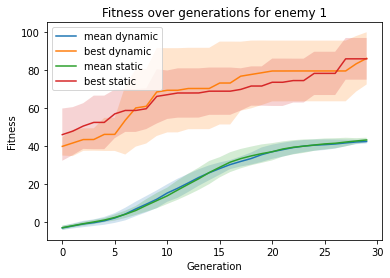

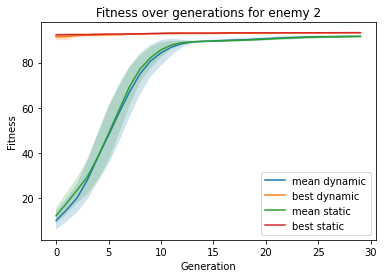

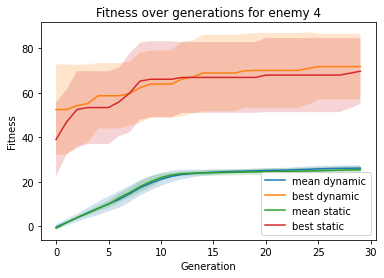

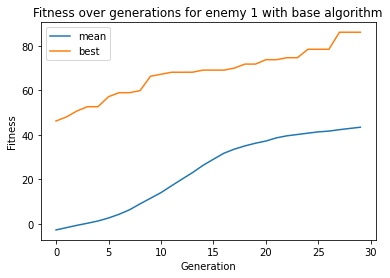

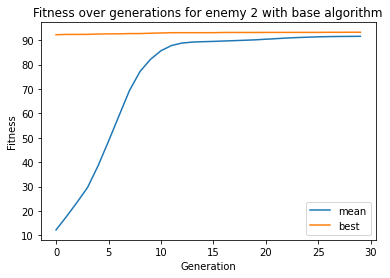

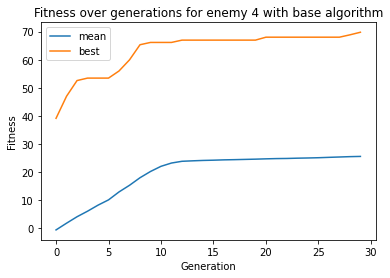

In [10]:
# plot means and best fitness
import matplotlib.pyplot as plt

gens = 30

for i in [1,2,4]:
    plt.figure()
    plt.plot(results_d[i]['mean'], label='mean dynamic')
    plt.plot(results_d[i]['best'], label='best dynamic')
    plt.plot(results_b[i]['mean'], label='mean static')
    plt.plot(results_b[i]['best'], label='best static')
#     results_d, pops_d, envs_d
    plt.fill_between(range(gens), results_d[i]['mean'] - results_d[i]['mean_std'], results_d[i]['mean'] + results_d[i]['mean_std'], alpha=0.2)
    plt.fill_between(range(gens), results_d[i]['best'] - results_d[i]['best_std'], results_d[i]['best'] + results_d[i]['best_std'], alpha=0.2)
    plt.fill_between(range(gens), results_b[i]['mean'] - results_b[i]['mean_std'], results_b[i]['mean'] + results_b[i]['mean_std'], alpha=0.2)
    plt.fill_between(range(gens), results_b[i]['best'] - results_b[i]['best_std'], results_b[i]['best'] + results_b[i]['best_std'], alpha=0.2)
    plt.legend()
    # add title: fitness over generations for enemy 2
    plt.title('Fitness over generations for enemy ' + str(i))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    
for i in [1,2,4]:
    plt.figure()
    plt.plot(results_b[i]['mean'], label='mean')
    plt.plot(results_b[i]['best'], label='best')
#     results_d, pops_d, envs_d
    
    plt.legend()
    # add title: fitness over generations for enemy 2
    plt.title('Fitness over generations for enemy ' + str(i) + ' with base algorithm')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')


{'whiskers': [<matplotlib.lines.Line2D at 0x2027fdad310>,
 'caps': [<matplotlib.lines.Line2D at 0x2027fdadac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202169534f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2021a853b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x20218bf6d60>,
 'means': []}

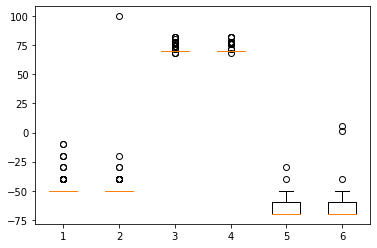

In [40]:
from optimization_dummy import evaluate_gain

#fit_pop1 = np.array([evaluate(envs[enemy], pops[1]) for enemy in [1,2,3]])
#gain_pop1 = evaluate_gain(envs[2], pops[2])
# fit_pop2 = [evaluate(envs[enemy], pops[3]) for enemy in [1,2,3]]

# print(np.mean(fit_pop1, axis= 1))
# # print(fit_pop1)

# plt.figure()
# plt.bar([1,2,3], np.mean(fit_pop1, axis= 1))
# plt.xticks([1,2,3], ['enemy 1', 'enemy 2', 'enemy 3'])
# plt.ylabel('Fitness')
# plt.title('Fitness for each enemy')

pops_d[2]
plt.figure()
gains = []


for i in [1,2,4]:
    gain_d = np.zeros(100,)
    gain_b = np.zeros(100,)
    for _ in range(5):
        gain_d += evaluate_gain(envs_d[i], pops_d[i])
        gain_b += evaluate_gain(envs_b[i], pops_b[i])
    gains.append(gain_b/5)
    gains.append(gain_d/5)

plt.boxplot(gains)

# evaluate_gain(envs_d[1], pops_d[1]).shape
#plt.boxplot((evaluate_gain(envs_d[i], pops_d[i]) + evaluate_gain(envs_d[i], pops_d[i]))/5)

Text(0.5, 1.0, 'individual gain for dynamic and static mutation with enemies 1,2 and 4')

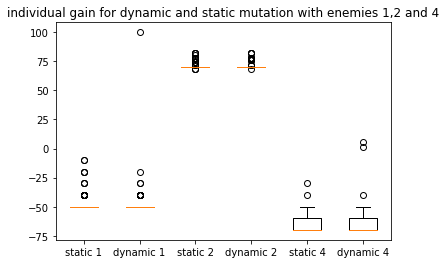

In [44]:
plt.boxplot(gains)
plt.xticks([1, 2, 3, 4, 5, 6], ["static 1", "dynamic 1", "static 2", "dynamic 2", "static 4", "dynamic 4"])
plt.title('individual gain for dynamic and static mutation with enemies 1,2 and 4')

In [49]:
# for i in [1,2,4]:
#     plt.figure()
#     plt.plot(results_d[i]['div'], label='mean dynamic')
#     plt.plot(results_b[i]['div'], label='best dynamic')

results_d[i]['div']


[26.597698669808132,
 26.734948267924995,
 26.862047139256664,
 26.95825755290651,
 27.062418724649103,
 27.103797754939155,
 27.132212024739573,
 27.146893108008623,
 27.162566097381273,
 27.213824659970946,
 27.259983854674335,
 27.29878350116933,
 27.3181740498707,
 27.342594851448645,
 27.374926264591522,
 27.38300771388515,
 27.367954410156393,
 27.39316486649788,
 27.43212591750421,
 27.436409172918474,
 27.431145502302666,
 27.428912320087086,
 27.459561790673234,
 27.478655121438607,
 27.454428344681777,
 27.495507559476124,
 27.519908909621854,
 27.532698479159727,
 27.52802154170437,
 27.535093401028234]

In [43]:
std1 = np.std(means, axis=0)
std2 = np.std(means, axis=1)

print(std1)
print(std2)

[0.47803171 0.59819111 1.49718714 1.81117154 2.10677867 1.27822223
 2.24645111 2.57880031 1.72886286 2.72046397 3.17256689 4.70133202
 5.43848064 5.48275168 6.14282318 6.0270443  6.5429775  7.05496658
 7.40764167 7.81029932 8.97636077 8.61446502 7.96181391 7.60062789
 6.86192784 6.30170727 5.57751407 4.5247962  3.31446033 2.63567541]
[15.71399471 19.47603156]


In [44]:
means

array([[ 0.80205421,  2.94925624,  4.95916206,  8.71195034, 12.83755056,
        18.5706097 , 22.30048634, 26.28232808, 29.01088318, 29.61740505,
        29.93076736, 30.85115485, 31.59341314, 32.66342039, 33.14011076,
        34.80295642, 36.26860564, 37.41892392, 39.48259849, 41.19845711,
        42.18538705, 43.9653937 , 45.67155481, 46.8455455 , 48.79551328,
        50.09887133, 51.81735384, 54.19269446, 56.97329089, 58.69084222],
       [ 1.75811764,  4.14563845,  7.95353634, 12.33429341, 17.0511079 ,
        21.12705417, 26.79338857, 31.43992871, 32.46860889, 35.058333  ,
        36.27590114, 40.25381889, 42.47037442, 43.62892375, 45.42575713,
        46.85704503, 49.35456064, 51.52885707, 54.29788184, 56.81905576,
        60.1381086 , 61.19432374, 61.59518264, 62.04680127, 62.51936897,
        62.70228588, 62.97238198, 63.24228687, 63.60221155, 63.96219303]])